In [1]:
from IPython.display import display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def dodanie(arr1, arr2):
    data = arr1.copy()
    for i in range(len(arr1)):
        for j in range(len(arr1[0])):
            for k in range(3):
                if (np.int16(arr1[i, j, k]) + np.int16(arr2[i, j ,k]) <= 255):
                    data[i, j, k] = arr1 [i,j,k] +arr2[i,j,k]
                else:
                    data[i,j,k] = 255

    return data

def splot(RGB, Mf):
    r = int(len(Mf)/2)
    nr = 0
    for i in range(len(Mf)):
        for j in range(len(Mf[0])):
            nr += Mf[i][j]
    print(nr)
    nr = max(nr, 1)
    RGB2 = np.zeros((len(RGB), len(RGB[0]),3), dtype=np.uint8,)
    for x in range(r, len(RGB)-r):
        for y in range(r, len(RGB[0])-r):
            tmp = np.zeros(3)
            for i in range(len(Mf)):
                for j in range(len(Mf[0])):
                    tmp += RGB[x-r+i][y-r+j]*Mf[i][j]
            tmp = abs(tmp)
            tmp /= nr
            for i in range(3):
                if tmp[i] > 255:
                    tmp[i] = 255
            RGB2[x][y] = tmp
    return RGB2

In [8]:
def convolve_edge(RGB, typeF="P"):
    data = np.zeros(RGB.shape)
    filters = {
        "R": [
            np.array([[ 1, 0], [ 0,-1]]),
            np.array([[ 0, 1], [-1, 0]])
        ],
        "P": [
            np.array([[-1,-1,-1], [ 0, 0, 0], [ 1, 1, 1]]),
            np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
        ],
        "S": [
            np.array([[-1,-2,-1], [ 0, 0, 0], [ 1, 2, 1]]),
            np.array([[-2, -1, 0], [-1, 0, 1], [0, 1, 2]]),
            np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
            np.array([[0, 1, 2], [-1, 0, 1], [-2, -1, 0]]),
        ]
    }
    filter_matrices = filters[typeF]
    if typeF == "S":
        data1 = dodanie(splot(RGB, filter_matrices[0]), splot(RGB, filter_matrices[1]))
        data2 = dodanie(splot(RGB, filter_matrices[2]), splot(RGB, filter_matrices[3]))
        data = dodanie(data1, data2)
    else:
        data = dodanie(splot(RGB, filter_matrices[0]), splot(RGB, filter_matrices[1]))
    return data

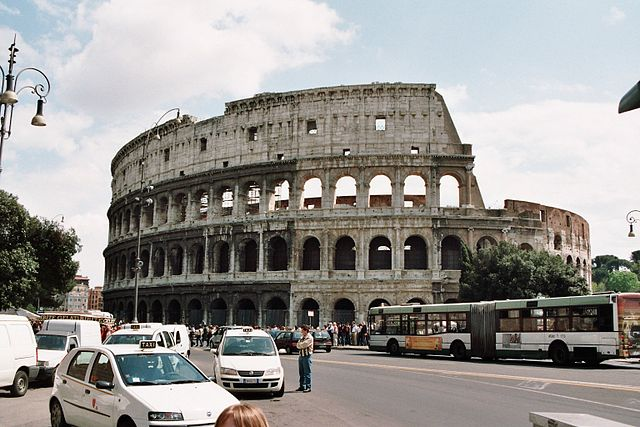

In [4]:
path="./Koloseum.png"
img = Image.open(path)
display(img)
arr = np.array(img)

0
0


display-im6.q16: unable to open X server `' @ error/display.c/DisplayImageCommand/432.


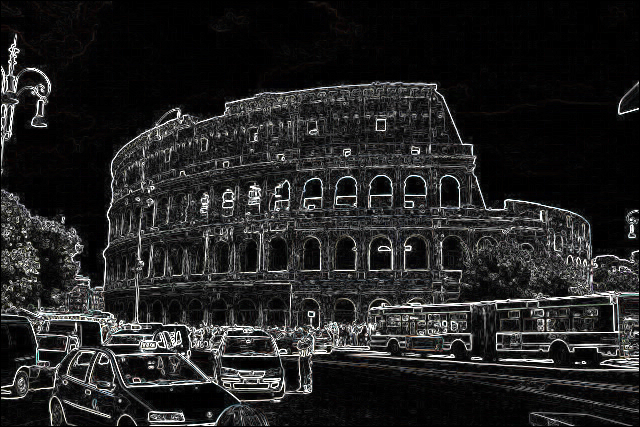

In [5]:
data = convolve_edge(arr, "R")
img2 = Image.fromarray(data, 'RGB')
img2.show()
display(img2)

0
0


display-im6.q16: unable to open X server `' @ error/display.c/DisplayImageCommand/432.


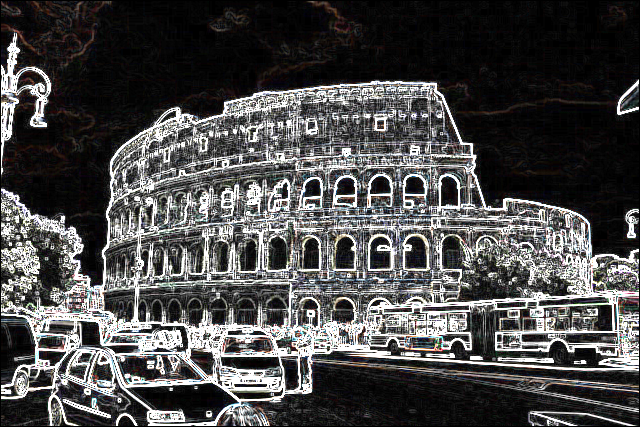

In [6]:
data2 = convolve_edge(arr, "P")
img3 = Image.fromarray(data2, 'RGB')
img3.show()
display(img3)

0
0
0
0


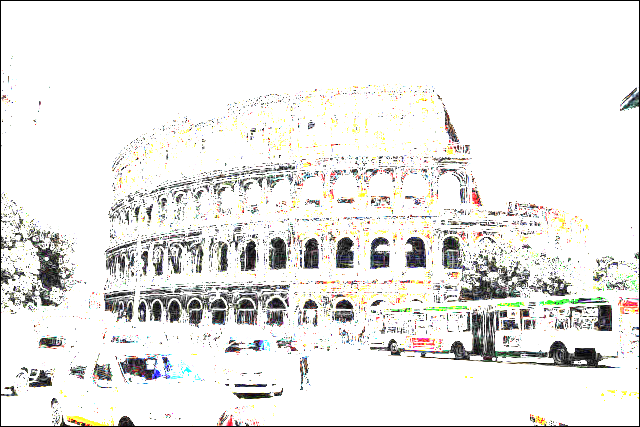

display-im6.q16: unable to open X server `' @ error/display.c/DisplayImageCommand/432.


In [9]:
data2 = convolve_edge(arr, "S")
img3 = Image.fromarray(data2, 'RGB')
img3.show()
display(img3)